In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [63]:
dataset = pd.read_csv("iris.csv")

In [64]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [66]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [67]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [69]:
dataset.drop(['Id'], inplace = True, axis = 1)

In [70]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


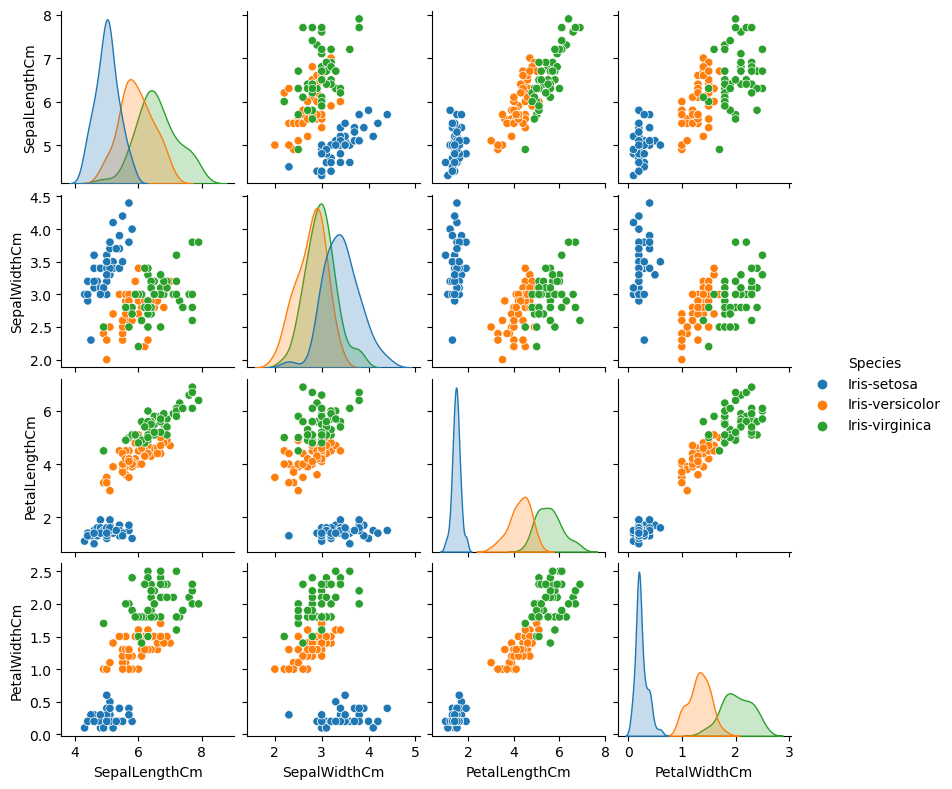

In [72]:
sns.pairplot(dataset, hue='Species', height=2)

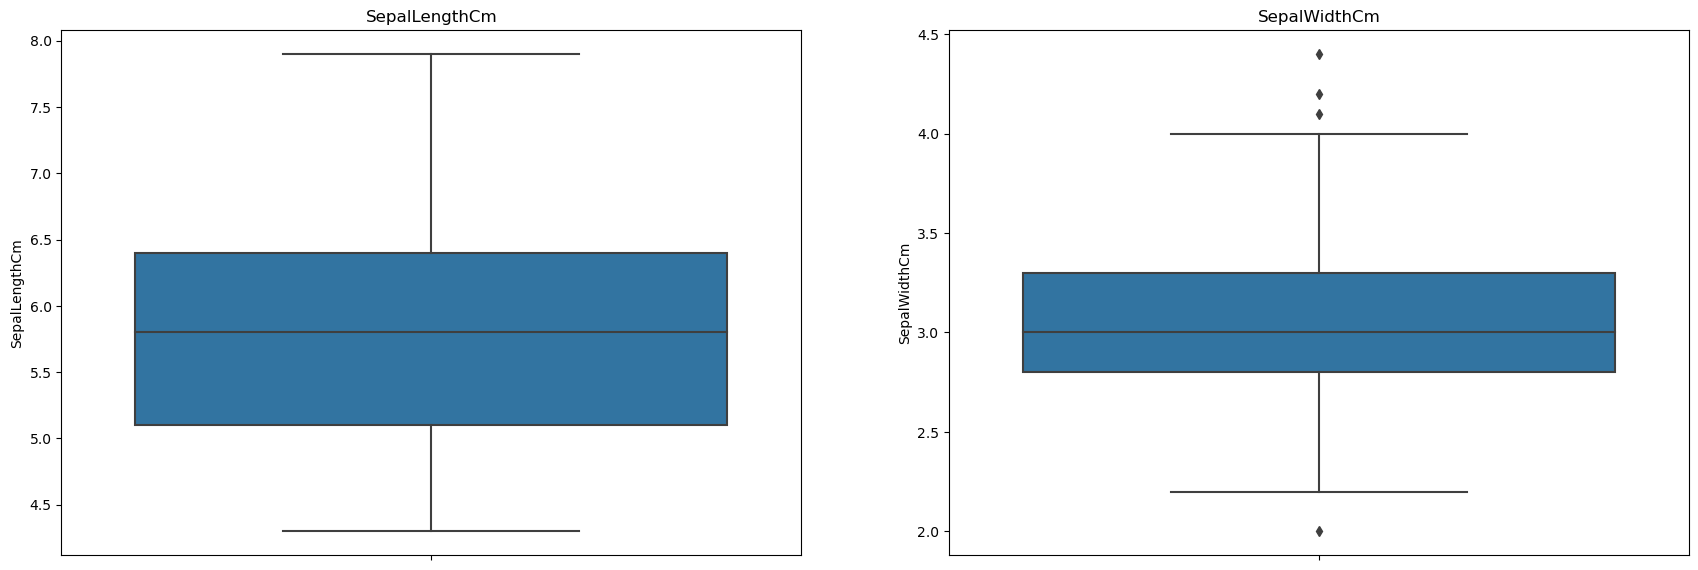

In [80]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=dataset.SepalLengthCm)
plt.title("SepalLengthCm")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=dataset.SepalWidthCm)
plt.title("SepalWidthCm")



plt.show()

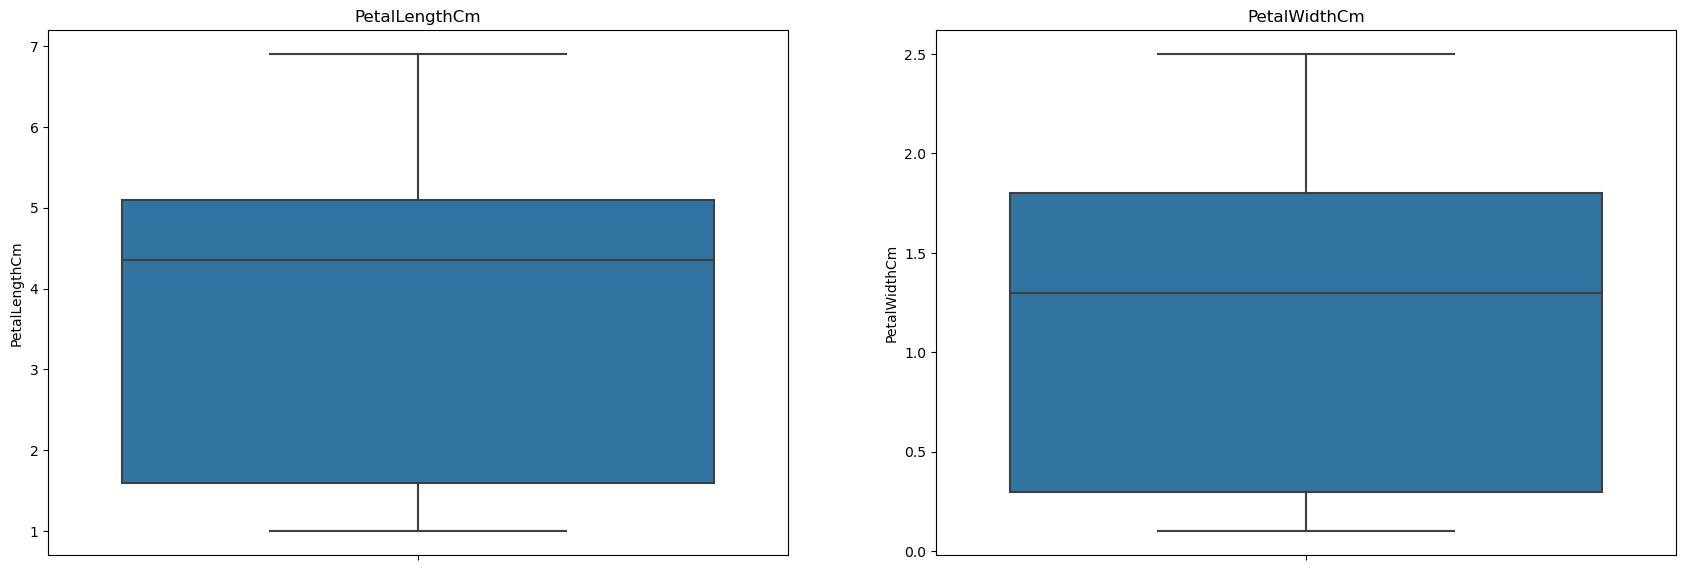

In [88]:


plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=dataset.PetalLengthCm)
plt.title("PetalLengthCm")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=dataset.PetalWidthCm)
plt.title("PetalWidthCm")



plt.show()

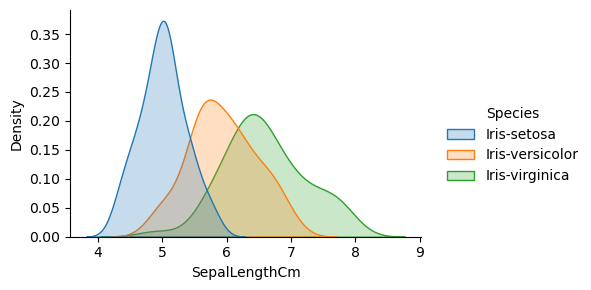

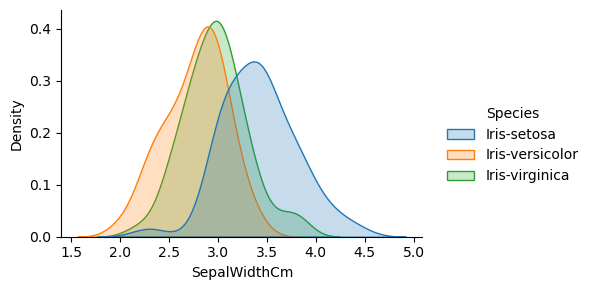

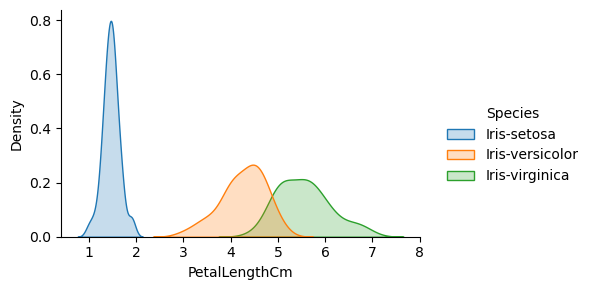

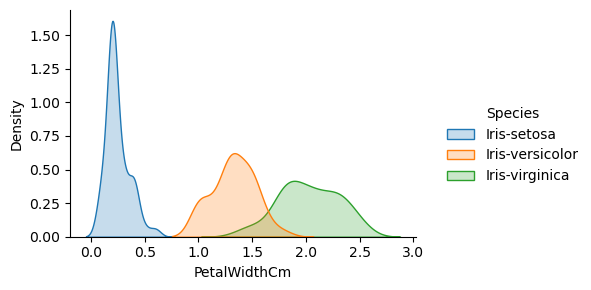

In [92]:
import warnings 

warnings.filterwarnings('ignore')


# Make the plots
sns.displot(dataset, x=dataset['SepalLengthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(dataset, x=dataset['SepalWidthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(dataset, x=dataset['PetalLengthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(dataset, x=dataset['PetalWidthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)

# Display the plots
plt.show()

In [93]:
dataset.drop(['Species'],inplace=True,axis=1)

In [94]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
data = dataset.iloc[:,0:].values

In [100]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,680.824400,1
1,152.368706,2
2,78.940841,3
3,57.317873,4
4,46.561630,5
5,38.930963,6
6,34.190688,7
7,30.063874,8
8,27.842356,9
9,26.048202,10


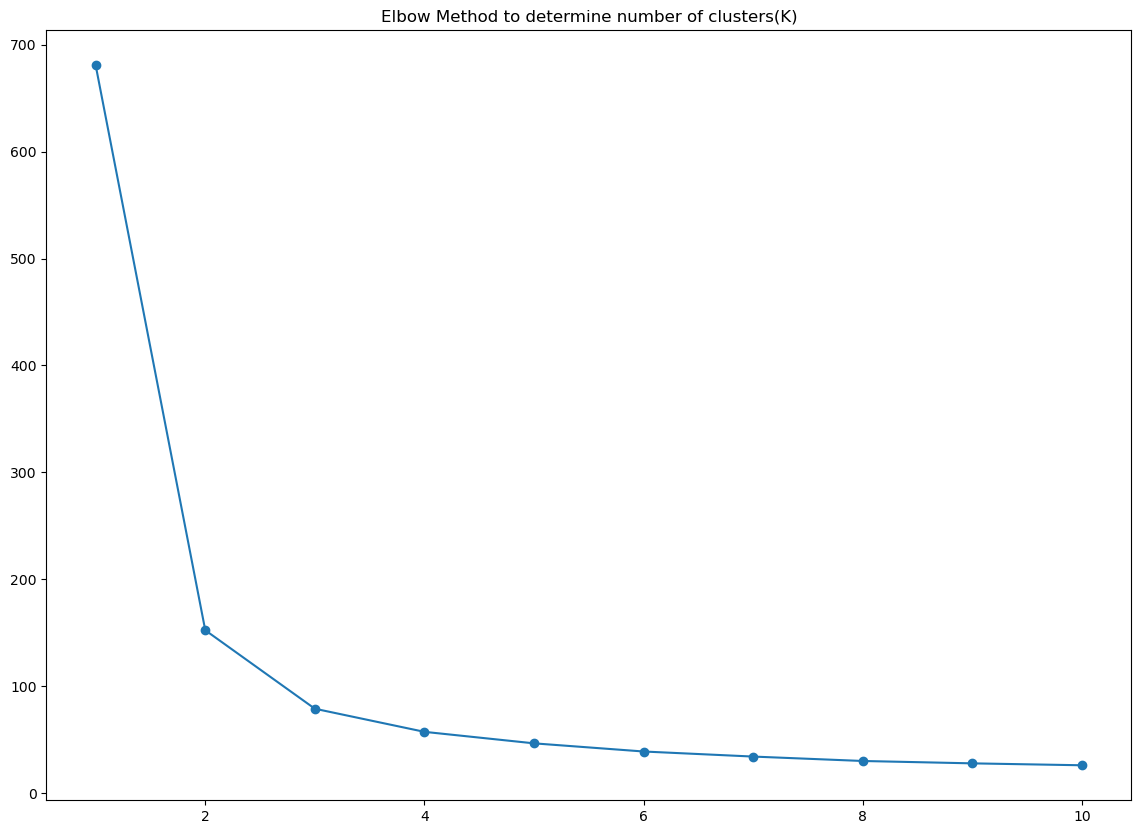

In [98]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

In [112]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(data)
prediction=kmeans.fit_predict(data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [113]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [114]:
clustered_data = dataset.copy()
clustered_data["cluster_index"] = prediction

In [115]:
clustered_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_index
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

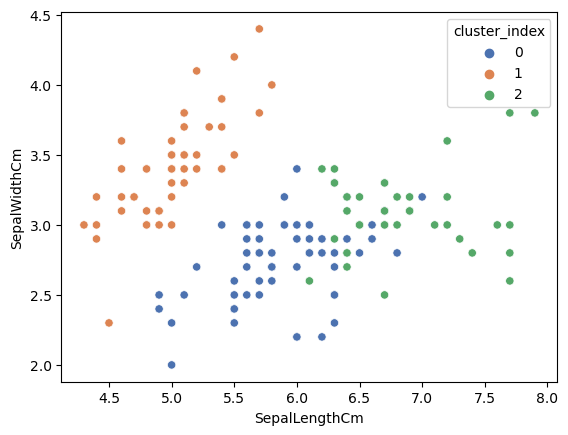

In [116]:
sns.scatterplot(x=clustered_data.SepalLengthCm,
                y=clustered_data.SepalWidthCm,
                hue=clustered_data.cluster_index,
                palette="deep")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

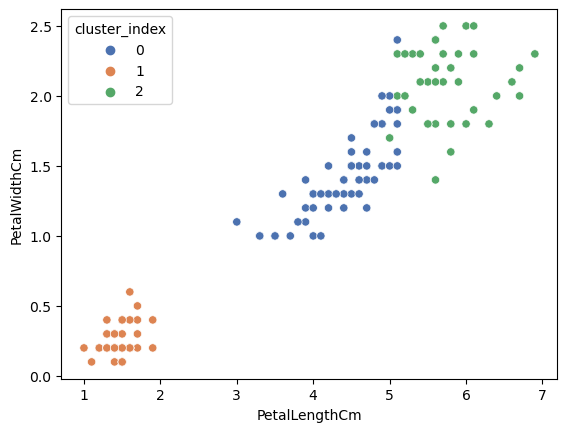

In [117]:
sns.scatterplot(x=clustered_data.PetalLengthCm,
                y=clustered_data.PetalWidthCm,
                hue=clustered_data.cluster_index,
                palette="deep")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

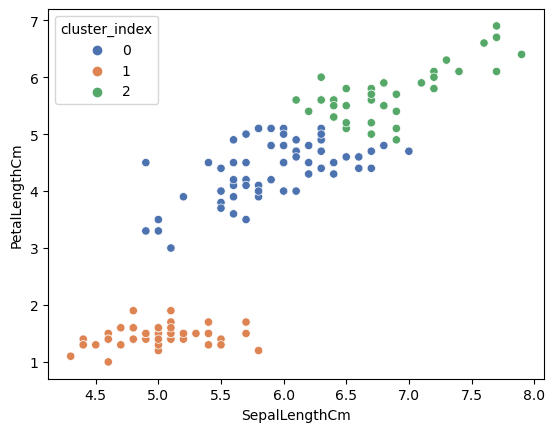

In [118]:
sns.scatterplot(x=clustered_data.SepalLengthCm,
                y=clustered_data.PetalLengthCm,
                hue=clustered_data.cluster_index,
                palette="deep")

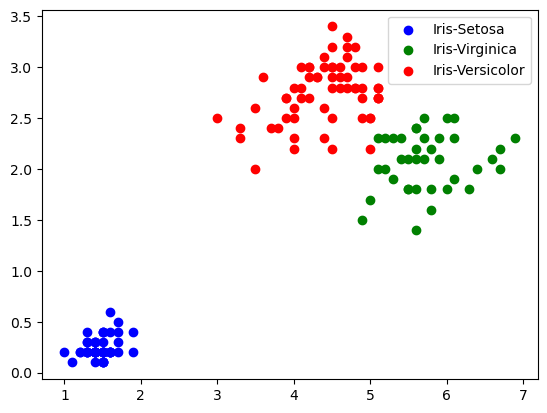

In [119]:
plt.scatter(data[prediction==1,2],data[prediction==1,3], color = 'b', label = 'Iris-Setosa')
plt.scatter(data[prediction==2,2],data[prediction==2,3], color = 'g', label = 'Iris-Virginica')
plt.scatter(data[prediction==0,2],data[prediction==0,1], color = 'r', label = 'Iris-Versicolor')
plt.legend()

In [120]:
clustered_data.cluster_index.unique()

array([1, 0, 2])